In [2]:
import keras
keras.__version__

'2.2.2'

### Paragraph 1 : Original
# Predicting house prices: a regression example

This notebook contains the code samples found in Chapter 3, Section 6 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----


In our two previous examples, we were considering classification problems, where the goal was to predict a single discrete label of an 
input data point. Another common type of machine learning problem is "regression", which consists of predicting a continuous value instead 
of a discrete label. For instance, predicting the temperature tomorrow, given meteorological data, or predicting the time that a 
software project will take to complete, given its specifications.

Do not mix up "regression" with the algorithm "logistic regression": confusingly, "logistic regression" is not a regression algorithm, 
it is a classification algorithm.

### Paragraph 1 : Tranlation
# 집값 예측하기: 회귀 분석 예제

이 Notebook은 Deep Learning with Python의 3장 5절에 나오는 예제 코드가 포함되어 있습니다.
원본 텍스트(Deep Learning with Python)에 훨씬 더 많은 자료, 특히 추가 설명과 그림들이 포함되어 있습니다.
여기에서는 예제 코드와 코드에 관련된 설명만 제공됩니다.

----
이전의 두 예시에서, 우리는 입력 데이터에 대해 단일 이산형 라벨을 예측하는 것이 목표인 데이터분류 문제를 다뤘습니다. 
기계학습 문제의 또 다른 일반적인 유형은 "회귀 (regression)"입니다. 이 회귀 분석은 이산형 라벨 대신 연속 값을 예측하는 것입니다. 
예를 들어 주어진 기상 데이터를 통해 내일 기온을 예측하거나, 주어진 설계서(사양)를 통해서 소프트웨어 프로젝트가 완료되는데 걸리는 시간을 예측할 수 있습니다. 

### Paragraph 2 : Original
## The Boston Housing Price dataset


We will be attempting to predict the median price of homes in a given Boston suburb in the mid-1970s, given a few data points about the suburb at the time, such as the crime rate, the local property tax rate, etc.

The dataset we will be using has another interesting difference from our two previous examples: it has very few data points, only 506 in total, split between 404 training samples and 102 test samples, and each "feature" in the input data (e.g. the crime rate is a feature) has a different scale. 

For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12, others between 0 and 100...

Let's take a look at the data:

### Paragraph 2 : Tranlation
## 보스턴 주택 값 데이터 셋

우리는 범죄율, 지방 재산세율 등과 같은 데이터를 가지고,  1970년대 중반 보스턴 교외의 주택 평균 가격을 예측할 것입니다. 

우리가 사용하게 될 데이터 세트는 이전의 두 가지 예시와는 또 다른 흥미로운 점이 있습니다. 데이터 포인터가 거의 없고 전체 506개의 데이터는 404개의 학습 데이터와 102개의 테스트 데이터로 나누어져 있으며, 입력 데이터의 각 'feature'
(예: 범죄율)은 규모가 다릅니다. 

예를 들어 일부 값은 0과 1사이의 값을 취하는 비율이며, 또 다른 값은 1에서 12사이의 값을 가지거나, 또는 0에서 100사이의 값을 취합니다.

데이터를 한번 볼까요?

In [3]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)


As you can see, we have 404 training samples and 102 test samples. The data comprises 13 features. The 13 features in the input data are as follow:

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

The targets are the median values of owner-occupied homes, in thousands of dollars:

보시다시피 404개의 교육 샘플과 102개의 테스트 샘플이 있습니다. 데이터는 13가지의 feature로 구성됩니다. 
입력 데이터의 13가지 특징은 다음과 같습니다: 

1. 1인당 범죄율.
2. 25,000평방 피트 이상을 위해 구역화된 주거지의 비율. 
3. 도시당 비소매 사업장의 비율 
4. Charles 강에 대한 더미 비율 (강이 경계에 있으면 1, 그렇지 않으면 0)
5. 질소 산화물 농도 (1,000만 명 당).
6. 주거 당 평균 객실 수.
7. 1940년 이전에 건설된 건물 중 소유주가 있는 건물의 비율.
8. 5개의 보스턴 고용센터에 대한 거리 가중치 
9. 방사형 고속도로 접근성 지수.
10. 10,000달러당 종부세율.
11. 마을 별 학생-교사 비율.
12. 1000 * (Bk - 0.63) ** 2 ( 여기서 BK는 도시의 흑인 거주 비율) 
13. 인구의 낮은 정도 (%)

목표는 수천 달러 기준으로 소유자가 거주하는 주택의 중앙 값입니다.

In [7]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13


The prices are typically between \$10,000 and \$50,000. If that sounds cheap, remember this was the mid-1970s, and these prices are not inflation-adjusted.

가격은 보통 $10,000 ~ $ 50,000 사이의 가격입니다. 이 가격이 싸게 들린다면, 1970년대 중반에 해당하는 것을 기억하세요. 이 가격은 인플레이션을 조정하지 않습니다. 

### Paragraph 3 : Original
## Preparing the data


It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. 

A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. 

This is easily done in Numpy:

### Paragraph 3 : Translate
## 데이터 준비하기 

완전히 다른 범위를 가지는 데이터를 신경망에 주입하는 것은 문제가 될 수 있습니다. 
물론 네트워크가 자동적으로 다른 범위로 구성된 데이터에 대해서 적응할 수 있지만, 분명히 학습하는 것을 더 어렵게 할 것입니다. 

이러한 데이터를 다루는 일반적인 모범 사례는 feature 별로 정규화(normalization)하는 것입니다. 입력 데이터의 각 feature ( 입력 데이터 행렬의 한 열)에 대해 feature의 평균 값을 빼고, 표준 편차로 나눕니다. 따라서 feature는 0 주위에 집중될 것이고, 단위 표준편차를 가지게 될 것입니다.
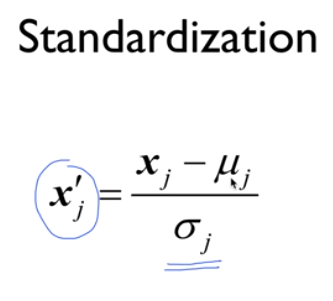


In [8]:
mean = train_data.mean(axis=0) # 준비된 13개의 값의 데이터의 평균 (axis=0으로 설정함으로써 열 연산을 하도록 설정한 것)
train_data -= mean
std = train_data.std(axis=0) # 표준 편차 (13개 feature의 분산의 값)
train_data /= std

test_data -= mean
test_data /= std


Note that the quantities that we use for normalizing the test data have been computed using the training data. We should never use in our workflow any quantity computed on the test data, even for something as simple as data normalization.

테스트 데이터를 정규화하기 위해 사용하는 값은 학습 데이터를 이용하여 계산합니다. 

작업을 진행함에 있어서 데이터 정규화와 같은 간단한 작업을 하더라도 테스트 데이터로 계산된 값(quantity)을 절대로 사용해서는 안 됩니다.


### Paragraph 4 : Original
## Building our network


Because so few samples are available, we will be using a very small network with two 
hidden layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using 
a small network is one way to mitigate overfitting.

### Paragraph 4 : Translate
## 네트워크 구축하기 

사용할 수 있는 샘플이 너무 적기 때문에, 2개의 hidden layer가 있는 매우 작은 네트워크를 사용하며, 각 레이어는 64개의 유닛으로 구성됩니다. 
일반적으로 학습 데이터가 적을수록 과적합 현상이 심해지며, 소규모 네트워크를 사용하는 것이 과적합을 완화할 수 있는 한가지 방법입니다. 


In [9]:
from keras import models
from keras import layers

def build_model():
    # 동일한 모델을 여러번 인스턴스화 해야하므로, 함수를 사용하여 모델을 생성합니다. 
    model = models.Sequential() # 순차 모델 
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],))) # train_data.shape[1] 은 13 입니다.
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


Our network ends with a single unit, and no activation (i.e. it will be linear layer). 
This is a typical setup for scalar regression (i.e. regression where we are trying to predict a single continuous value). 
Applying an activation function would constrain the range that the output can take; for instance if we applied a `sigmoid` activation function to our last layer, the network could only learn to predict values between 0 and 1. 
Here, because the last layer is purely linear, the network is free to learn to predict values in any range.

Note that we are compiling the network with the `mse` loss function -- Mean Squared Error, the square of the difference between the 
predictions and the targets, a widely used loss function for regression problems.

We are also monitoring a new metric during training: `mae`. This stands for Mean Absolute Error. It is simply the absolute value of the 
difference between the predictions and the targets. For instance, a MAE of 0.5 on this problem would mean that our predictions are off by \$500 on average.

해당 네트워크는 단일 유닛으로 끝나며, 활성화되지 않습니다. (즉, 선형 레이어가 됩니다.) 이는 스칼라 회귀에 대한 일반적인 설정입니다. 
(즉, 단일 연속 값을 예측하려는 회귀입니다.)  활성화 함수를 적용하면 출력에 사용할 수 있는 범위가 한정됩니다. 예를 들어 마지막 레이어에 `sigmoid` 활성화 함수를 이용한다면 네트워크는 0과 1사이의 값만 예측할 수 있습니다. 
여기서 마지막 계층은 순전히 선형이기 때문에, 네트워크는 모든 범위의 값을 예측하는 것을 자유롭게 학습할 수 있습니다. 

손실함수로 `mse(Mean Squared Error)`를 이용하여 컴파일한다는 점에 주목하세요. `평균 제곱 오차(mse)`는 예측과 오차 사이의 차에 대한 제곱이며, 회귀 문제에서 널리 사용되는 손실 함수입니다. 

또한 학습 중에 새로운 측정 지표(metric) `mae`를 이용해 관찰합니다. 이는 평균 절대 오류(Mean Absolute Error)를 나타냅니다. 이는 예측과 목표 차이의 절댓값입니다. 예를들어, 해당 문제에서 0.5의 `mae`값은 예측이 평균 $500달러 씩 벗어났음을 의미합니다. 

### Paragraph 5 : Original
## Validating our approach using K-fold validation


To evaluate our network while we keep adjusting its parameters (such as the number of epochs used for training), we could simply split the data into a training set and a validation set, as we were doing in our previous examples. 

However, because we have so few data points, the validation set would end up being very small (e.g. about 100 examples). 

A consequence is that our validation scores may change a lot depending on _which_ data points we choose to use for validation and which we choose for training, i.e. the validation scores may have a high _variance_ with regard to the validation split. This would prevent us from reliably evaluating our model.

The best practice in such situations is to use K-fold cross-validation. It consists of splitting the available data into K partitions 
(typically K=4 or 5), then instantiating K identical models, and training each one on K-1 partitions while evaluating on the remaining 
partition. The validation score for the model used would then be the average of the K validation scores obtained.

### Paragraph 5 : Translate
## K-fold 유효성 확인을 사용하여 접근 방식을 검증하기 

매개변수(parameter)(예: 학습에 사용된 epoch 수)를 계속 조정하면서 네트워크를 평가하려면, 이전 예제에서 수행했던 것처럼 교육 세트와 유효성 검사 세트로 데이터를 분할하면 됩니다. 

하지만 데이터 포인트가 매우 적기 때문에, 유효성 검사 세트는 매우 작아지게 됩니다.(예: 약 100가지 예시를 이용)

결과적으로 우리의 유효성 평가 점수는 유효성 확인을 위해 선택한 데이터 포인트와 학습을 위해 선택한 데이터에 따라 많이 달라질 수 있습니다. 즉 유효성 검사 점수가 유효성 검사 세트를 분할하는 것에 있어 높은 _변동_ 을 가질 수 있는 것입니다. 
이는 우리 모델을 신뢰할 수 있게 평가할 수 없습니다. 

이러한 상황에서 가장 좋은 방법은 k-fold 교차 검증(K-fold cross-validation)을 이용하는 것입니다. 사용 가능한 데이터를 K 파티션으로 분할한 다음(일반적으로 K= 4 또는 5), K개의 동일한 모델을 인스턴스화 하고 남은 부분을 평가하면서 K-1 파티션에서 각각 학습을 진행합니다. 

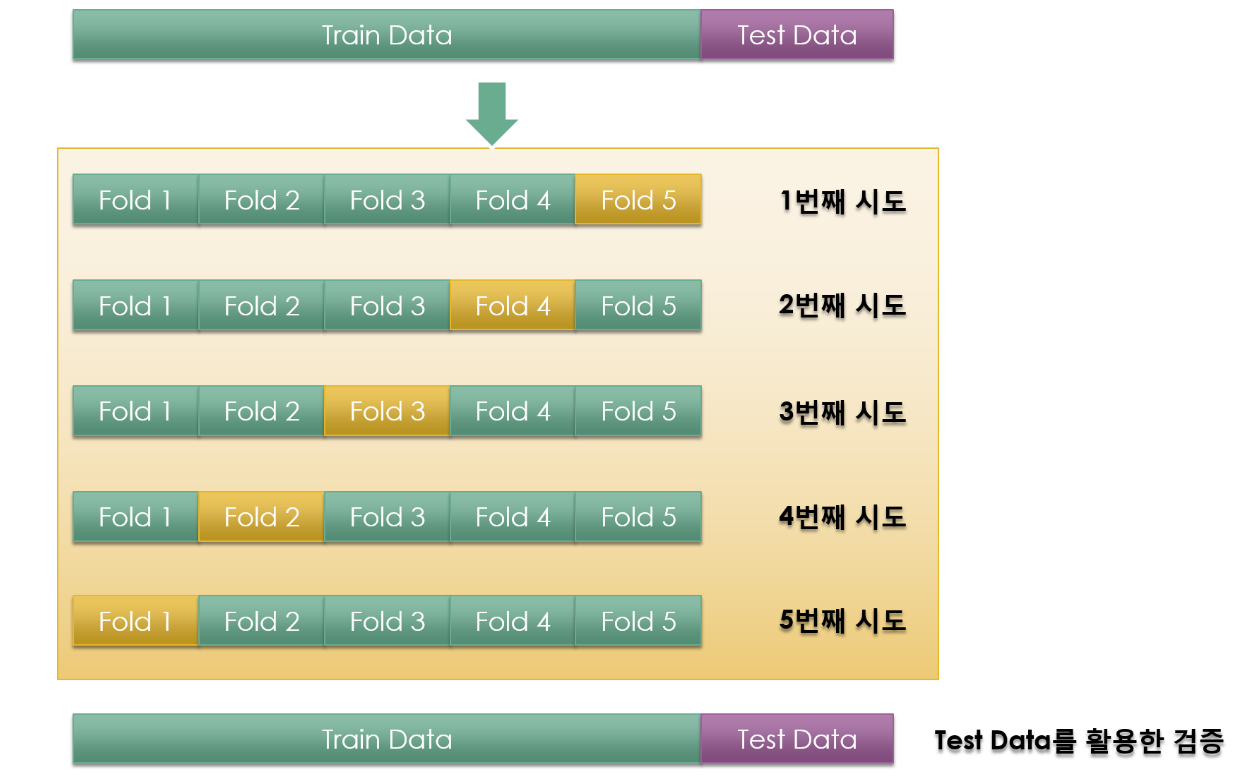
출처: http://cinema4dr12.tistory.com/1275

In terms of code, this is straightforward:

코드 측면에서, 이는 간단합니다.

In [11]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    # 유효성 검사 데이터 준비하기: 파티션 #k에 해당하는 데이터
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    # 학습 데이터 준비하기 : 나머지 파티션에 해당하는 데이터 
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)

    # Build the Keras model (already compiled)
    # 모델을 빌드합니다. (이미 컴파일 되어있습니다.)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    # 모델을 학습시킵니다. (verbose = 0이며 자동으로 진행됩니다.)
    hist = model.fit(partial_train_data, partial_train_targets,epochs = num_epochs, batch_size = 1, verbose=0)
    
    # Evaluate the model on the validation data
    # 유효 데이터를 이용하여 모델을 평가합니다.
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [12]:
all_scores

[2.104800594915258, 2.3485601680113537, 2.986228296072176, 2.4282649743675004]

In [13]:
np.mean(all_scores)

2.466963508341572


As you can notice, the different runs do indeed show rather different validation scores, from 2.1 to 2.9. Their average (2.4) is a much more reliable metric than any single of these scores -- that's the entire point of K-fold cross-validation. In this case, we are off by \$2,400 on average, which is still significant considering that the prices range from \$10,000 to \$50,000. 

Let's try training the network for a bit longer: 500 epochs. To keep a record of how well the model did at each epoch, we will modify our training loop to save the per-epoch validation score log:

보시다시피, 각 실행에서 2.0에서 3.0까지의 유효성 검증 점수가 실제로 다르게 표시되는 것을 볼 수 있습니다. 이 값에 대한 평균 (2.4)은 각각 점수들 중 어느 하나보다 훨씬 더 신뢰할 수 있는 수치입니다. 이것이 바로 K-fold 교차 검증(K-fold cross-validation)의 핵심입니다. 

이 경우에 우리는 평균적으로 \$2,400달러 정도 벗어나 있으며, 이는 \$10,000 ~ \$50,000의 가격 범위를 고려할 때 중요합니다. 

좀 더 길게 네트워크를 교육해봅시다 : 500 epoch. 모델이 각 epoch마다 얼마나 잘 수행되었는지 기록하기 위해서, 각 epoch마다 유효성 검사 로그를 저장해야하고 이를 위해 학습 과정을 수정합니다. 

In [14]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [15]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
  
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


We can then compute the average of the per-epoch MAE scores for all folds:

그런 다음 모든 fold에 대한 epoch당 `mae`점수의 평균을 계산할 수 있습니다.

In [36]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

이것을 그림으로 표현해 봅시다: 

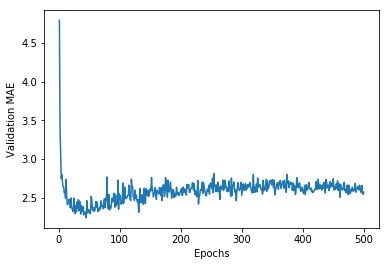

In [37]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


It may be a bit hard to see the plot due to scaling issues and relatively high variance. Let's:

* Omit the first 10 data points, which are on a different scale from the rest of the curve.
* Replace each point with an exponential moving average of the previous points, to obtain a smooth curve.

스케일링 문제나 상대적으로 높은 분산으로 인해 그림으로 보기 어려울 수 있습니다. 

* 곡선의 나머지 부분과 스케일 차이가 있을 수 있기 때문에 처음 10개의 데이터 포인터는 생략하세요
* 매끄러운 곡선을 얻으려면, 각 포인트를 이전 포인트의 지수 이동 평균(EMA : Exponential Moving Average)으로 대체합니다. 

EMA에 대한 참고 링크 : http://blog.naver.com/PostView.nhn?blogId=ntkor&logNo=199891958


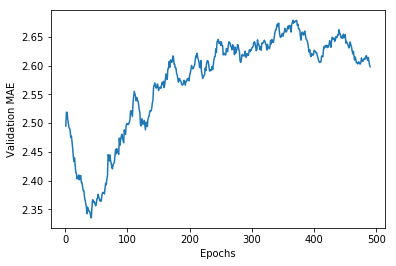

In [38]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


According to this plot, it seems that validation MAE stops improving significantly after 80 epochs. 
Past that point, we start overfitting.

Once we are done tuning other parameters of our model (besides the number of epochs, we could also adjust the size of the hidden layers), we can train a final "production" model on all of the training data, with the best parameters, then look at its performance on the test data:

이 그림에 따르면, 유효성 검사 `mae`는 80epoch 이후 크게 개선되지 않는 것으로 보입니다. 그 시점을 지나서, 과적합(overfitting)이 시작됩니다. 

*** 일단 모델의 다른 매개변수(parameters)를 튜닝하면(epoch 수와 더불어 hidden layer의 크기 역시 조절할 수 있습니다.), 최상의 매개변수를 이용하여 모든 학습 데이터에 대해서 최종 "생산"모델을 학습할 수 있습니다. 그 다음 테스트 데이터에서 어떻게 동작하는지 확인하세요: 


In [39]:
# 새롭게 컴파일된 모델을 생성합니다. 
model = build_model()

# Train it on the entirety of the data.
# 전체 데이터에 대해서 학습을 진행합니다. 
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 666us/step


In [40]:
test_mae_score

2.669536880418366

We are still off by about \$2,550.

여전히 $2,600 정도 벗어나 있습니다. 

### Paragraph 6 : Original
## Wrapping up


Here's what you should take away from this example:

* Regression is done using different loss functions from classification; Mean Squared Error (MSE) is a commonly used loss function for 
regression.
* Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally the concept of "accuracy" does not apply for regression. A common regression metric is Mean Absolute Error (MAE).
* When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
* When there is little data available, using K-Fold validation is a great way to reliably evaluate a model.
* When little training data is available, it is preferable to use a small network with very few hidden layers (typically only one or two), in order to avoid severe overfitting.

This example concludes our series of three introductory practical examples. You are now able to handle common types of problems with vector data input:

* Binary (2-class) classification.
* Multi-class, single-label classification.
* Scalar regression.

In the next chapter, you will acquire a more formal understanding of some of the concepts you have encountered in these first examples, 
such as data preprocessing, model evaluation, and overfitting.

### Paragraph 6 : Translate
## 마무리하며...

이번 예제를 통해 여러분들이 얻고 가셔야 할 것들입니다. 

* 회귀 분석(Regression)은 분류(Classification)와는 다른 손실 함수를 사용하여 수행됩니다: 평균 제곱 오류(MSE)는 회귀 분석에 일반적으로 사용되는 손실함수 입니다. 
* 마찬가지로, 회귀 분석(Regression)에 사용할 평가 지표(evaluation metrics)는 분류(Classification)에 사용되는 지표와 다르며, 당연히 회귀 분석에는 "정확성(accuracy)"의 개념이 사용되지 않습니다. 일반적인 회귀 지표는 평균 절대 오차(MAE)입니다. 
* 입력 데이터의 피쳐 값이 다른 범위를 가진 경우, 전처리 과정을 통해 각각의 피쳐가 독립적으로 크기를 조정해야 합니다.
* 사용 가능한 데이터가 거의 없는 경우, K-fold 유효성 검사를 사용하면 모델을 안정적으로 평가할 수 있습니다. 
* 사용 가능한 학습 데이터가 거의 없는 경우 심각한 과적합(overfittig)을 피하기 위해 hidden layer가 거의 없는 소규모 네트워크(일반적으로 1~2개)를 사용하는 것이 좋습니다. 

이 예제를 마지막으로 세 가지 실용 예제 시리즈를 마칩니다. 이제 벡터 데이터 입력으로 일반적인 유형의 문제를 처리할 수 있습니다. 

* 이진 분류(Binary (2-class) classification)
* 다중, 단일 클래스 분류
* 스칼라(Scalar) 회귀

다음 장에서는 이러한 첫 번째 예제에서 직면한 몇 가지 개념(데이터 전처리, 모델 평가, 과적합)을 보다 공식적으로 이해하게 될 것입니다. 